In [1]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = '/content/drive/MyDrive/padded images/Train'
validation_dir = '/content/drive/MyDrive/padded images/Validation'
import os
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory not found: {validation_dir}")

train_datagen = ImageDataGenerator(
    rescale=1./255)



validation_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',


)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',

)

Found 151646 images belonging to 3 classes.
Found 15114 images belonging to 3 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [9]:
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,559,619 (5.95 MB)

 Trainable params: 1,559,619 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint]
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8830 - loss: 0.3210
Epoch 1: val_loss improved from inf to 0.44728, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 221s 9s/step - accuracy: 0.8833 - loss: 0.3200 - val_accuracy: 0.8297 - val_loss: 0.4473
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8417 - loss: 0.3561
Epoch 2: val_loss improved from 0.44728 to 0.34865, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 156s 8s/step - accuracy: 0.8426 - loss: 0.3557 - val_accuracy: 0.8344 - val_loss: 0.3487
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8912 - loss: 0.3171
Epoch 3: val_loss did not improve from 0.34865
20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.8907 - loss: 0.3174 - val_accuracy: 0.8531 - val_loss: 0.3572
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9018 - loss: 0.3204
Epoch 4: val_loss improved from 0.34865 to 0.29619, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━

In [35]:
model.save('my_model.keras')
test_dir='/content/drive/MyDrive/padded images/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',


)

Found 56723 images belonging to 3 classes.


In [36]:
model.evaluate(
    test_generator,
    batch_size=40,
    steps=20,

)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.2888 - loss: 2.9953


[2.9716291427612305, 0.3046875]

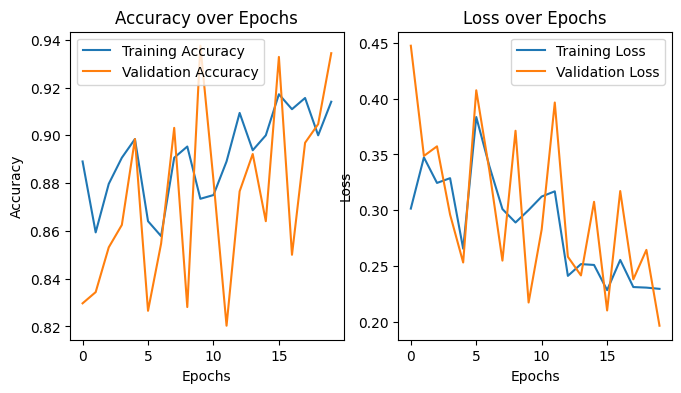

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
